Load Dataset

In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv("/content/Dataset .csv")

All information about dataset

In [3]:
print(data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

Finding NULL values

In [4]:
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


DATA Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Null values Details

In [6]:
print(data[data['Cuisines'].isnull()])

     Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville            

Null values replaced with unknown

In [7]:
data['Cuisines'] = data['Cuisines'].fillna('Unknown')


Found no Null value

In [8]:
print(data[data['Cuisines'].isnull()])

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]


In [9]:
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [10]:
pip install folium pandas


PLotted all the restorent location on static map


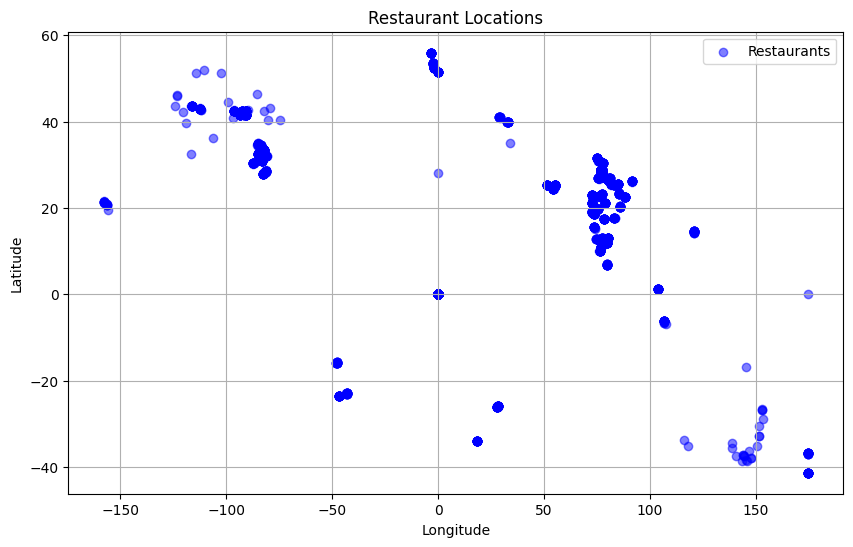

In [11]:
import matplotlib.pyplot as plt

# Plot scatter map
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5, c='blue', label='Restaurants')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations")
plt.legend()
plt.grid(True)
plt.show()


Heatmap to find corelation between different features

In [12]:
pip install seaborn pandas numpy matplotlib

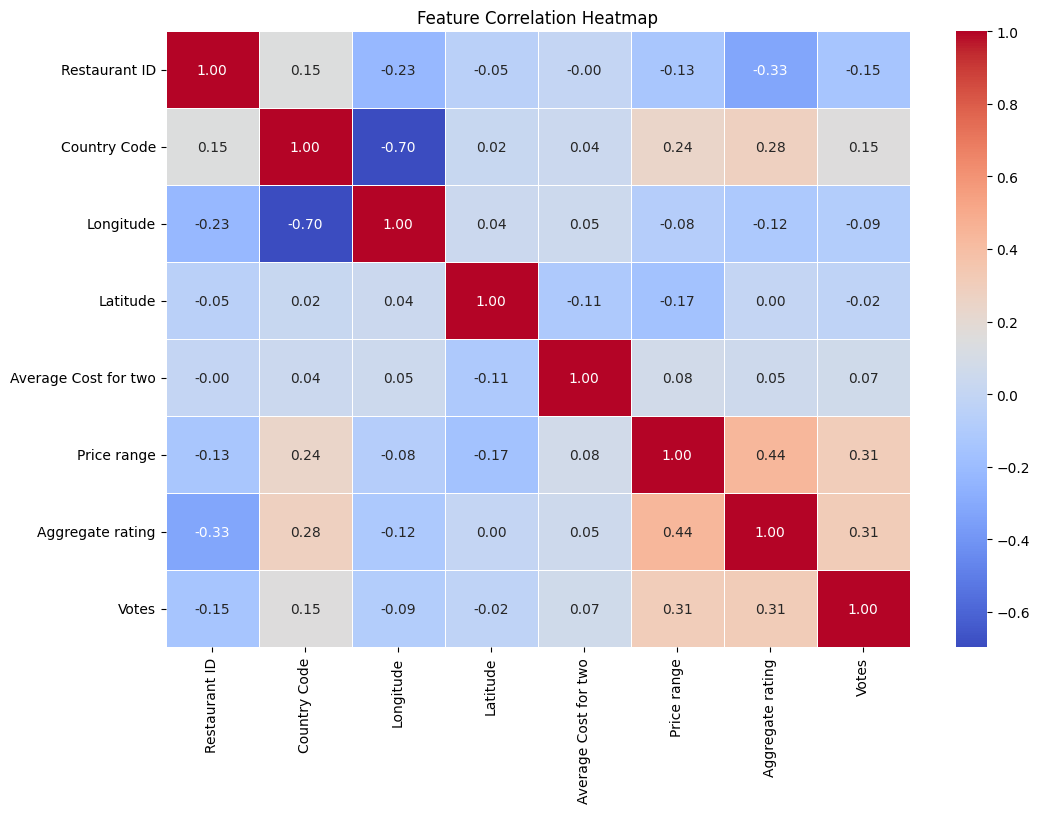

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert categorical variables to numerical for correlation analysis
df_encoded = data.select_dtypes(include=['number'])  # Select only numerical columns

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


Pair plot for visual corelation between differnt features

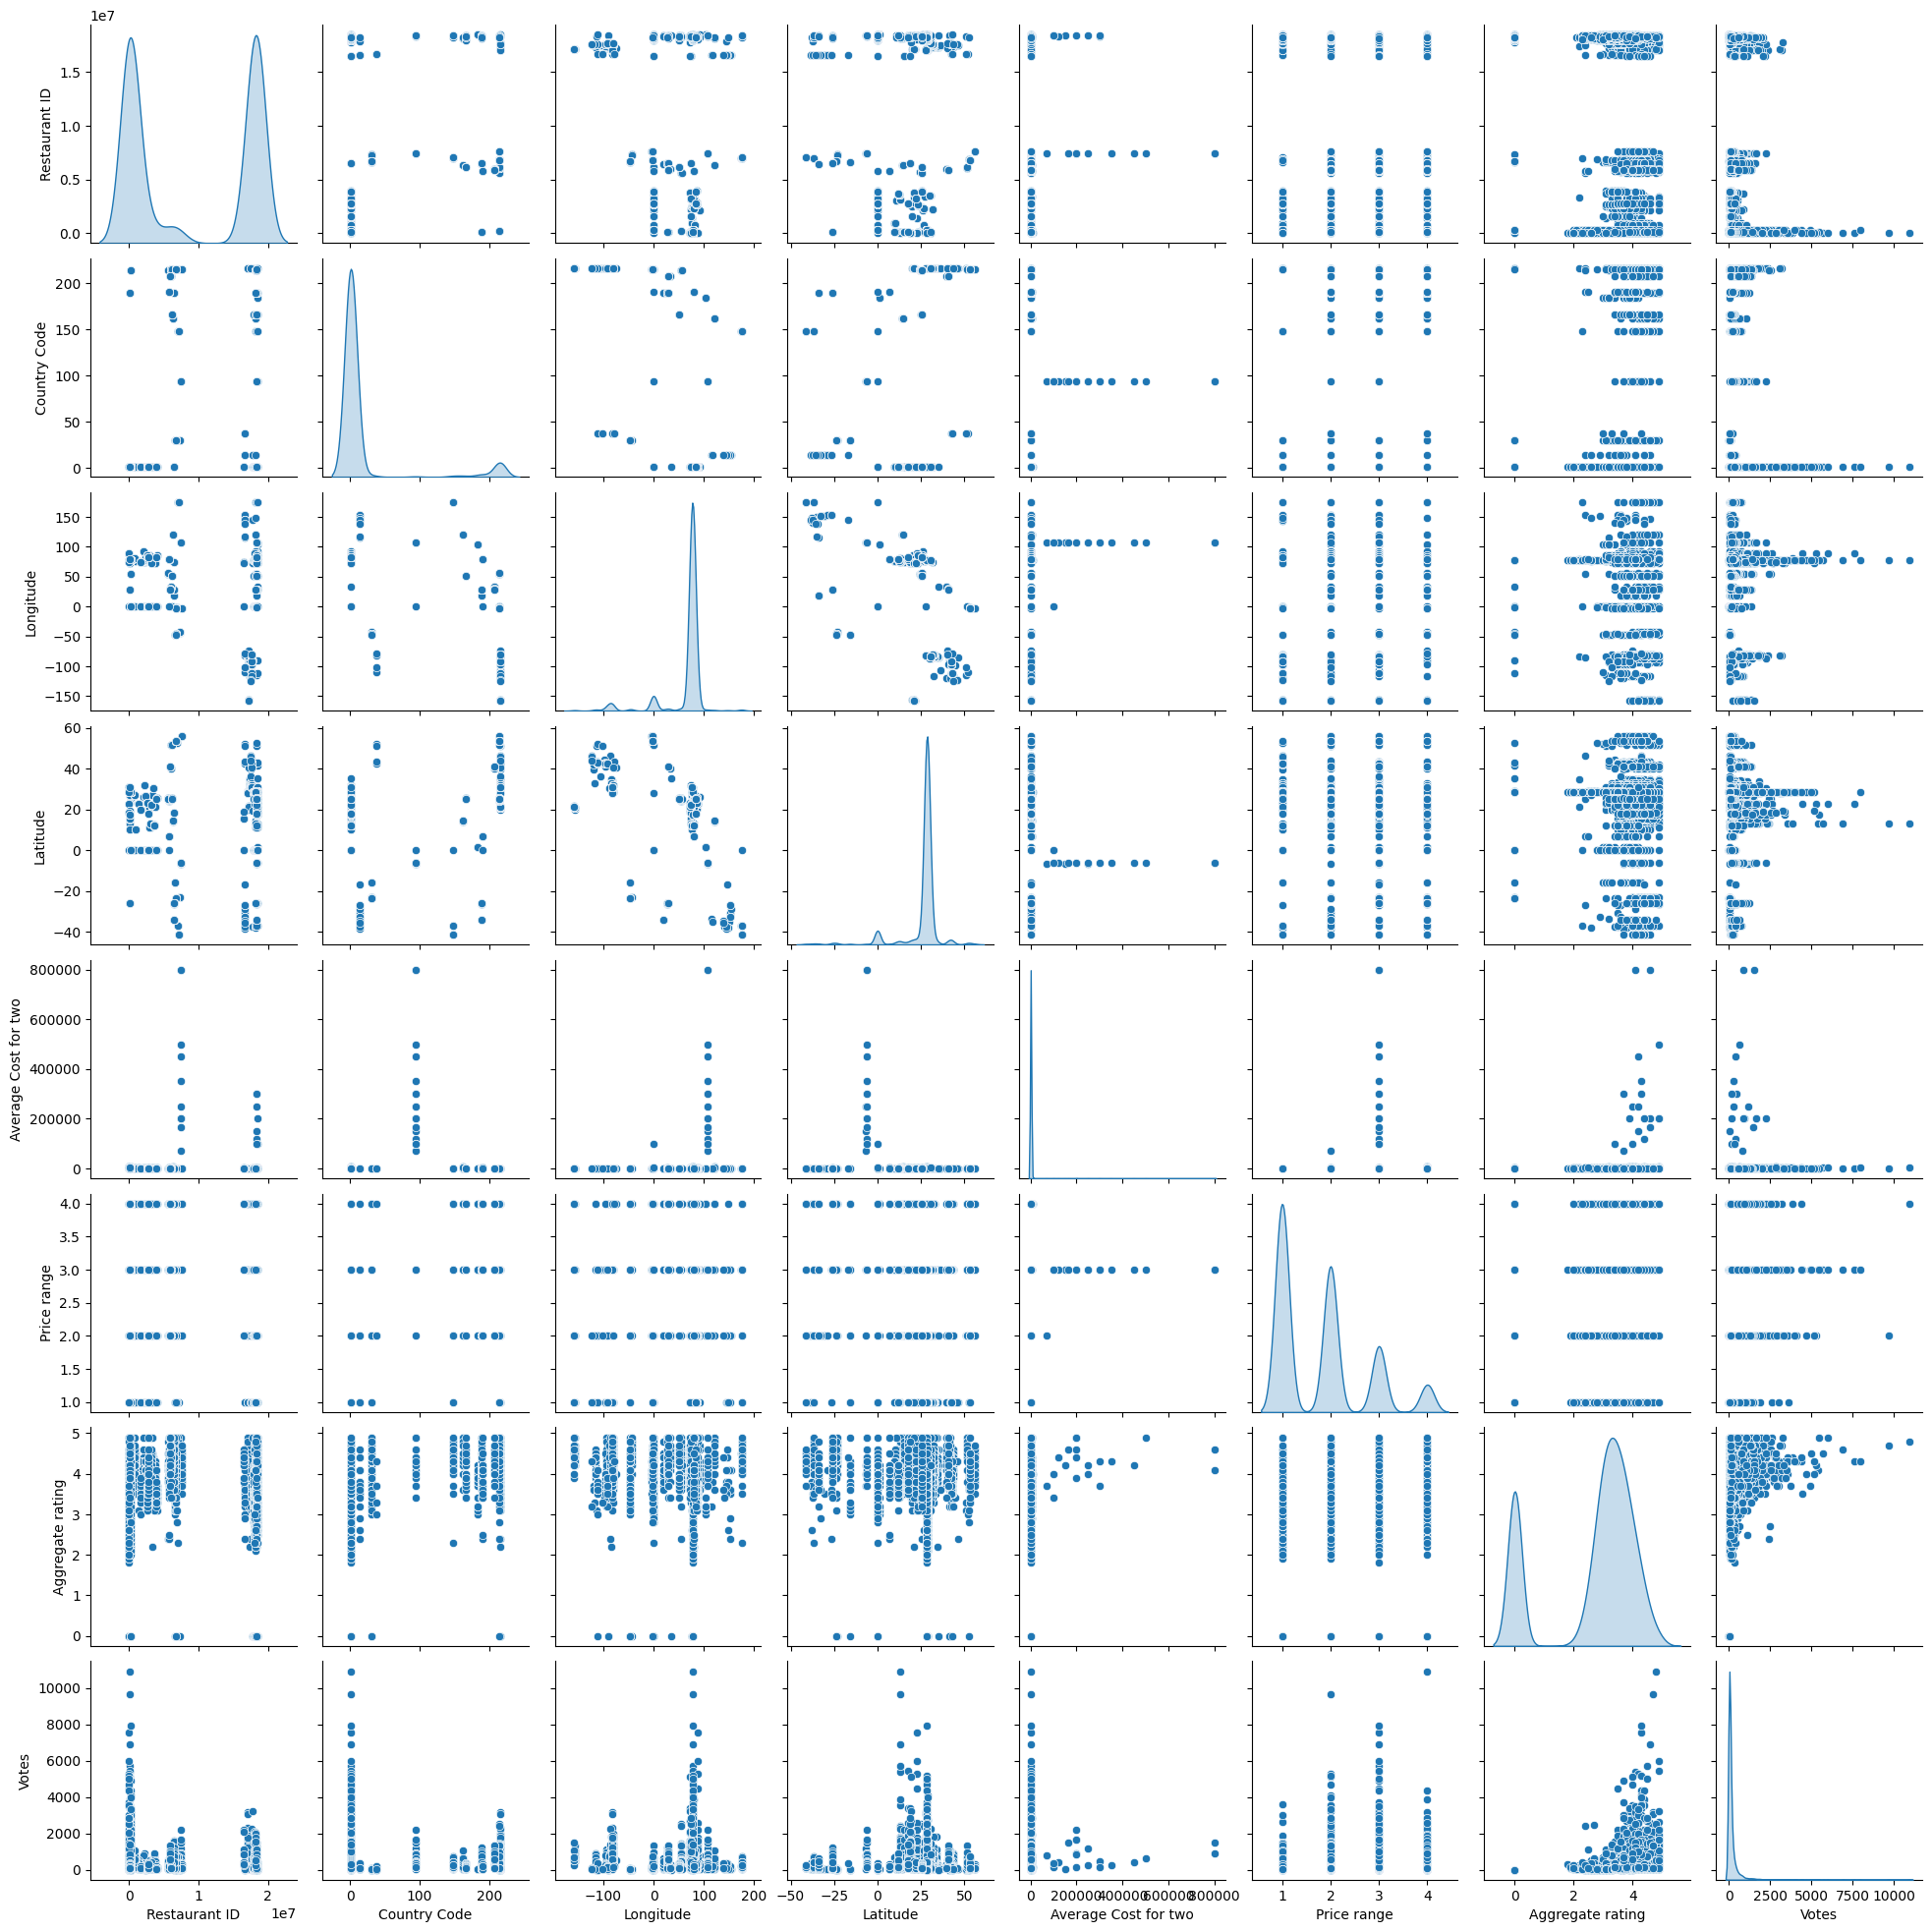

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for pair plot
numerical_data = data.select_dtypes(include=['number'])

# Create the pair plot
sns.pairplot(numerical_data, diag_kind='kde')

# Show the plot
plt.show()


On the basis of heatmap and pairplot droped the features which is not relevent for rating


In [15]:
data.drop(columns=['Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude'], inplace=True)

all the features with categorical values encoded

In [16]:
# Encode categorical variables
categorical_features = ['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Rating color', 'Rating text']
numerical_features = ['Average Cost for two', 'Price range', 'Votes']

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

Data splited into features and target variable

In [18]:
# Split data into features (X) and target variable (y)
X = data.drop(columns=['Aggregate rating'])  # Independent variables
y = data['Aggregate rating']  # Target variable (restaurant rating)

Splited data for training and **testing**

In [19]:
# Train-test split (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model training

linear regression


In [26]:
# Choose a regression model
model1 = LinearRegression()

# Create a pipeline with preprocessing and model
pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])

# Train the model
pipeline1.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Restaurant Name', 'City',
                                                   'Cuisines', 'Currency',
                                                   'Rating color',
                                                   'Rating text'])])),
                ('model', LinearRegression())])

pipeline for decision tree

In [27]:
model2 = DecisionTreeRegressor() #decision tree regression
# Create a pipeline with preprocessing and model
pipeline2=Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])
#model trainig
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Restaurant Name', 'City',
                                                   'Cuisines', 'Currency',
                                                   'Rating color',
                                                   'Rating text'])])),
                ('model', DecisionTreeRegressor())])

regression matrix

In [29]:
# Predict on test data
y_pred = pipeline1.predict(X_test)

# Compute regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.030646595067642456
R-squared (R²): 0.9865355327015884


mse and r squared error matrix for decision tree regression


In [30]:
# Predict on test data
y_pred = pipeline2.predict(X_test)

# Compute regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.049748677248677244
R-squared (R²): 0.9781431041042051


featurs importance for regression model

In [41]:
feature_names = numerical_features + list(pipeline1.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
coefficients = pipeline1.named_steps['model'].coef_

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


                      Feature  Importance
7751  Rating color_Dark Green    0.780325
7758    Rating text_Excellent    0.780325
7762    Rating text_Very Good    0.572047
7752       Rating color_Green    0.572047
7759         Rating text_Good    0.357752
...                       ...         ...
6112           City_Faridabad   -0.120356
7761         Rating text_Poor   -0.316188
7754         Rating color_Red   -0.316188
7755       Rating color_White   -1.455888
7760    Rating text_Not rated   -1.455888

[7763 rows x 2 columns]


feature which is most influential

In [42]:
import pandas as pd

# Get the coefficients from the linear regression model
coefficients = pipeline1.named_steps['model'].coef_

# Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Add a column for the absolute value of the coefficients (to sort by magnitude)
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()

# Sort the features by their absolute coefficient values (importance), in descending order
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Select top 5 most influential features (or change the number as needed)
top_features = feature_importance.head(5)

# Print the most influential features
print(top_features[['Feature', 'Importance']])


                      Feature  Importance
7755       Rating color_White   -1.455888
7760    Rating text_Not rated   -1.455888
7751  Rating color_Dark Green    0.780325
7758    Rating text_Excellent    0.780325
7762    Rating text_Very Good    0.572047


features importance for decision tree regression model

In [44]:
importances = pipeline2.named_steps['model'].feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))


                                                Feature    Importance
7755                                 Rating color_White  8.967326e-01
7753                                Rating color_Orange  5.153063e-02
7761                                   Rating text_Poor  2.219950e-02
7756                                Rating color_Yellow  1.308520e-02
2                                                 Votes  2.660586e-03
...                                                 ...           ...
7146                           Cuisines_Japanese, Steak -2.017838e-19
1860                    Restaurant Name_Express Kitchen -2.017838e-19
2228                 Restaurant Name_Green Tea Fanatics -3.026757e-19
3684                            Restaurant Name_Nescafe -3.026757e-19
7404  Cuisines_North Indian, Continental, Italian, T... -2.925866e-18

[7763 rows x 2 columns]
